## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 22s 449us/step - loss: 1.9326 - acc: 0.3009 - val_loss: 1.7533 - val_acc: 0.3746
Epoch 2/500
50000/50000 [==============================] - 20s 407us/step - loss: 1.7079 - acc: 0.3893 - val_loss: 1.6646 - val_acc: 0.4052
Epoch 3/500
50000/50000 [==============================] - 21s 415us/step - loss: 1.6292 - acc: 0.4189 - val_loss: 1.6239 - val_acc: 0.4241
Epoch 4/500
50000/50000 [==============================] - 21s 422us/step - loss: 1.5594 - acc: 0.4442 - val_loss: 1.5769 - val_acc: 0.4361
Epoch 5/500
50000/50000 [==============================] - 20s 407us/step - loss: 1.5119 - acc: 0.4617 - val_loss: 1.5155 - val_acc: 0.4594
Epoch 6/500
50000/50000 [==============================] - 20s 409us/step - loss: 1.4729 - acc: 0.4756 - val_loss: 1.4764 - val_acc: 0.4695
Epoch 7/500
50000/50000 [==============================] - 22s

Epoch 90/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.3269 - acc: 0.8839 - val_loss: 3.0314 - val_acc: 0.5013
Epoch 107/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.2886 - acc: 0.8960 - val_loss: 3.1048 - val_acc: 0.5009
Epoch 108/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.2934 - acc: 0.8944 - val_loss: 3.1654 - val_acc: 0.4933
Epoch 109/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.2758 - acc: 0.9008 - val_loss: 3.1843 - val_acc: 0.4990
Epoch 110/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2921 - acc: 0.8955 - val_loss: 3.2459 - val_acc: 0.4883
Epoch 111/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2856 - acc: 0.8979 - val_loss: 3.1988 - val_acc: 0.5004
Epoch 112/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.2432 - acc: 0.9133 - val_loss: 3.3294 - val_acc: 0.4899
Epoch 113/500


50000/50000 [==============================] - 9s 176us/step - loss: 0.1592 - acc: 0.9432 - val_loss: 4.1640 - val_acc: 0.4863
Epoch 186/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.2445 - acc: 0.9156 - val_loss: 4.2077 - val_acc: 0.4941
Epoch 187/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.2428 - acc: 0.9158 - val_loss: 4.1442 - val_acc: 0.4983
Epoch 188/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.1854 - acc: 0.9348 - val_loss: 4.2097 - val_acc: 0.4896
Epoch 189/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.1472 - acc: 0.9477 - val_loss: 4.2238 - val_acc: 0.4910
Epoch 190/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.1440 - acc: 0.9502 - val_loss: 4.2467 - val_acc: 0.4922
Epoch 191/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1429 - acc: 0.9489 - val_loss: 4.1926 - val_acc: 0.4965
Epoch 192/500
50000/50000 [

50000/50000 [==============================] - 9s 183us/step - loss: 0.1440 - acc: 0.9506 - val_loss: 4.5985 - val_acc: 0.4894
Epoch 251/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.1312 - acc: 0.9538 - val_loss: 4.5771 - val_acc: 0.4950
Epoch 252/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.1181 - acc: 0.9596 - val_loss: 4.7018 - val_acc: 0.4910
Epoch 253/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.1853 - acc: 0.9382 - val_loss: 4.7175 - val_acc: 0.4890
Epoch 254/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1665 - acc: 0.9428 - val_loss: 4.4808 - val_acc: 0.4887
Epoch 255/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1271 - acc: 0.9563 - val_loss: 4.5628 - val_acc: 0.4974
Epoch 256/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0942 - acc: 0.9670 - val_loss: 4.6951 - val_acc: 0.4946
Epoch 257/500
50000/50000 [

Epoch 308/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0814 - acc: 0.9718 - val_loss: 4.9544 - val_acc: 0.4929
Epoch 309/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1194 - acc: 0.9599 - val_loss: 4.9345 - val_acc: 0.4854
Epoch 310/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1452 - acc: 0.9520 - val_loss: 4.8934 - val_acc: 0.4921
Epoch 311/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.1060 - acc: 0.9642 - val_loss: 4.9917 - val_acc: 0.4904
Epoch 312/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.1317 - acc: 0.9564 - val_loss: 4.9836 - val_acc: 0.4814
Epoch 313/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.1967 - acc: 0.9387 - val_loss: 4.8198 - val_acc: 0.4932
Epoch 314/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0710 - acc: 0.9757 - val_loss: 4.9249 - val_acc: 0.4938
Epoch 315/500

Epoch 366/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0980 - acc: 0.9674 - val_loss: 5.1551 - val_acc: 0.4909
Epoch 367/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.1453 - acc: 0.9527 - val_loss: 5.0598 - val_acc: 0.4846
Epoch 368/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.1330 - acc: 0.9566 - val_loss: 4.9707 - val_acc: 0.4931
Epoch 369/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0770 - acc: 0.9733 - val_loss: 5.0689 - val_acc: 0.4980
Epoch 370/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0652 - acc: 0.9780 - val_loss: 5.1422 - val_acc: 0.4946
Epoch 371/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1490 - acc: 0.9526 - val_loss: 5.1286 - val_acc: 0.4825
Epoch 372/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1281 - acc: 0.9579 - val_loss: 5.0335 - val_acc: 0.4917
Epoch 373/500

50000/50000 [==============================] - 9s 184us/step - loss: 0.0646 - acc: 0.9780 - val_loss: 4.9978 - val_acc: 0.5035
Epoch 425/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0506 - acc: 0.9829 - val_loss: 5.0435 - val_acc: 0.4934
Epoch 426/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0854 - acc: 0.9713 - val_loss: 5.1561 - val_acc: 0.4850
Epoch 427/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.1859 - acc: 0.9433 - val_loss: 5.1559 - val_acc: 0.4811
Epoch 428/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.1245 - acc: 0.9587 - val_loss: 5.0694 - val_acc: 0.4881
Epoch 429/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.0553 - acc: 0.9812 - val_loss: 5.0530 - val_acc: 0.4949
Epoch 430/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0202 - acc: 0.9946 - val_loss: 5.1247 - val_acc: 0.4951
Epoch 431/500
50000/50000 [

50000/50000 [==============================] - 9s 184us/step - loss: 0.2052 - acc: 0.9414 - val_loss: 5.0323 - val_acc: 0.4954
Epoch 483/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0593 - acc: 0.9805 - val_loss: 5.0386 - val_acc: 0.4960
Epoch 484/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0226 - acc: 0.9937 - val_loss: 5.0646 - val_acc: 0.4986
Epoch 485/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0090 - acc: 0.9986 - val_loss: 5.1235 - val_acc: 0.4927
Epoch 486/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0120 - acc: 0.9978 - val_loss: 5.0865 - val_acc: 0.5014
Epoch 487/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0130 - acc: 0.9968 - val_loss: 5.1522 - val_acc: 0.4941
Epoch 488/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.2047 - acc: 0.9426 - val_loss: 5.0865 - val_acc: 0.4883
Epoch 489/500
50000/50000 [

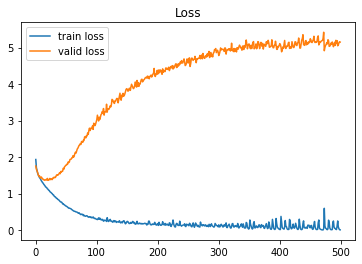

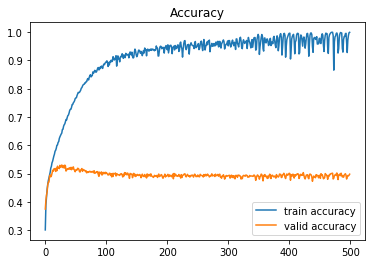

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [11]:
"""
Compile 模型
"""

model1 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model1.summary()

optimizer1 = keras.optimizers.SGD(lr=0.001)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model1.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 147us/step - loss: 2.2799 - acc: 0.1509 - val_loss: 2.2198 - val_acc: 0.2025
Epoch 2/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.1871 - acc: 0.2171 - val_loss: 2.1521 - val_acc: 0.2319
Epoch 3/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.1286 - acc: 0.2426 - val_loss: 2.1002 - val_acc: 0.2627
Epoch 4/500
50000/50000 [==============================] - 7s 136us/step - loss: 2.0830 - acc: 0.2618 - val_loss: 2.0599 - val_acc: 0.2757
Epoch 5/500
50000/50000 [==============================] - 7s 137us/step - loss: 2.0466 - acc: 0.2762 - val_loss: 2.0261 - val_acc: 0.2870
Epoch 6/500
50000/50000 [==============================] - 7s 136us/step - loss: 2.0165 - acc: 0.2888 - val_loss: 1.9993 - val_acc: 0.2997
Epoch 7/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.9916 - acc: 0.2993 - val_loss: 1.

50000/50000 [==============================] - 7s 134us/step - loss: 1.5907 - acc: 0.4440 - val_loss: 1.6026 - val_acc: 0.4363
Epoch 85/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5882 - acc: 0.4455 - val_loss: 1.5986 - val_acc: 0.4388
Epoch 86/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5857 - acc: 0.4467 - val_loss: 1.5997 - val_acc: 0.4383
Epoch 87/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.5837 - acc: 0.4469 - val_loss: 1.5967 - val_acc: 0.4409
Epoch 88/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5815 - acc: 0.4486 - val_loss: 1.5933 - val_acc: 0.4416
Epoch 89/500
 6912/50000 [===>..........................] - ETA: 5s - loss: 1.5959 - acc: 0.442

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 7s 132us/step - loss: 1.5394 - acc: 0.4623 - val_loss: 1.5625 - val_acc: 0.4481
Epoch 109/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5377 - acc: 0.4634 - val_loss: 1.5583 - val_acc: 0.4520
Epoch 110/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.5357 - acc: 0.4640 - val_loss: 1.5563 - val_acc: 0.4508
Epoch 111/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5337 - acc: 0.4637 - val_loss: 1.5548 - val_acc: 0.4525
Epoch 112/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.5319 - acc: 0.4641 - val_loss: 1.5525 - val_acc: 0.4491
Epoch 113/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.5300 - acc: 0.4649 - val_loss: 1.5515 - val_acc: 0.4531
Epoch 114/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.5283 - acc: 0.4663 - val_loss: 1.5503 - val_acc: 0.4526
Epoch 115/500
50000/50000 [

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 7s 137us/step - loss: 1.3700 - acc: 0.5207 - val_loss: 1.4356 - val_acc: 0.4883
Epoch 217/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3690 - acc: 0.5224 - val_loss: 1.4427 - val_acc: 0.4892
Epoch 218/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.3675 - acc: 0.5227 - val_loss: 1.4369 - val_acc: 0.4895
Epoch 219/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3663 - acc: 0.5224 - val_loss: 1.4324 - val_acc: 0.4931
Epoch 220/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.3643 - acc: 0.5236 - val_loss: 1.4329 - val_acc: 0.4902
Epoch 221/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.3635 - acc: 0.5251 - val_loss: 1.4323 - val_acc: 0.4923
Epoch 222/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3622 - acc: 0.5234 - val_loss: 1.4314 - val_acc: 0.4924
Epoch 223/500
50000/50000 [

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 7s 137us/step - loss: 1.2840 - acc: 0.5528 - val_loss: 1.4283 - val_acc: 0.4923
Epoch 287/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.2836 - acc: 0.5520 - val_loss: 1.3887 - val_acc: 0.5082
Epoch 288/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2819 - acc: 0.5541 - val_loss: 1.3875 - val_acc: 0.5070
Epoch 289/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.2804 - acc: 0.5544 - val_loss: 1.3965 - val_acc: 0.5024
Epoch 290/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.2795 - acc: 0.5539 - val_loss: 1.3908 - val_acc: 0.5082
Epoch 291/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2786 - acc: 0.5539 - val_loss: 1.3963 - val_acc: 0.5033
Epoch 292/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.2776 - acc: 0.5545 - val_loss: 1.4177 - val_acc: 0.4985
Epoch 293/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 1.2215 - acc: 0.5748 - val_loss: 1.3711 - val_acc: 0.5132
Epoch 344/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2203 - acc: 0.5737 - val_loss: 1.4058 - val_acc: 0.4994
Epoch 345/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.2204 - acc: 0.5742 - val_loss: 1.3910 - val_acc: 0.5042
Epoch 346/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.2190 - acc: 0.5733 - val_loss: 1.3697 - val_acc: 0.5101
Epoch 347/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.2176 - acc: 0.5747 - val_loss: 1.3770 - val_acc: 0.5090
Epoch 348/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2161 - acc: 0.5742 - val_loss: 1.3674 - val_acc: 0.5137
Epoch 349/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.2146 - acc: 0.5755 - val_loss: 1.3804 - val_acc: 0.5073
Epoch 350/500
50000/50000 [

50000/50000 [==============================] - 7s 141us/step - loss: 1.1619 - acc: 0.5942 - val_loss: 1.3659 - val_acc: 0.5169
Epoch 402/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1625 - acc: 0.5947 - val_loss: 1.3709 - val_acc: 0.5118
Epoch 403/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.1595 - acc: 0.5946 - val_loss: 1.3902 - val_acc: 0.5094
Epoch 404/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1593 - acc: 0.5941 - val_loss: 1.3539 - val_acc: 0.5181
Epoch 405/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.1581 - acc: 0.5950 - val_loss: 1.3495 - val_acc: 0.5186
Epoch 406/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.1570 - acc: 0.5964 - val_loss: 1.3464 - val_acc: 0.5238
Epoch 407/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1558 - acc: 0.5966 - val_loss: 1.3759 - val_acc: 0.5179
Epoch 408/500
50000/50000 [

50000/50000 [==============================] - 7s 133us/step - loss: 1.1052 - acc: 0.6139 - val_loss: 1.3742 - val_acc: 0.5133
Epoch 460/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1044 - acc: 0.6147 - val_loss: 1.3403 - val_acc: 0.5235
Epoch 461/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1033 - acc: 0.6152 - val_loss: 1.3990 - val_acc: 0.5014
Epoch 462/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1049 - acc: 0.6147 - val_loss: 1.3523 - val_acc: 0.5230
Epoch 463/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1023 - acc: 0.6153 - val_loss: 1.3354 - val_acc: 0.5282
Epoch 464/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1004 - acc: 0.6160 - val_loss: 1.3427 - val_acc: 0.5238
Epoch 465/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.0989 - acc: 0.6163 - val_loss: 1.3566 - val_acc: 0.5208
Epoch 466/500
50000/50000 [

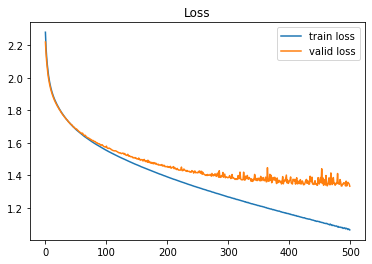

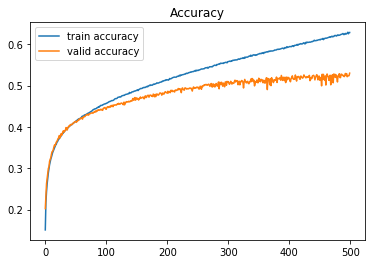

In [13]:
train1_loss = model1.history.history["loss"]
valid1_loss = model1.history.history["val_loss"]

train1_acc = model1.history.history["acc"]
valid1_acc = model1.history.history["val_acc"]

plt.plot(range(len(train1_loss)), train1_loss, label="train loss")
plt.plot(range(len(valid1_loss)), valid1_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train1_acc)), train1_acc, label="train accuracy")
plt.plot(range(len(valid1_acc)), valid1_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()